#### Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !kaggle datasets download priyamchoksi/credit-card-transactions-dataset

In [3]:
data = pd.read_csv('credit_card_transactions.csv')
data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


###Анализ общей информации о данных.

In [4]:
pd.options.display.max_columns = None
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


 *Вывод:
 обзор первых пяти строк датасета показывает, что в столбцах есть и могут быть пропущенные данные.Далее более детально изучим структуру данных.*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
data['name'] = data['first'] + " " +  data['last'] # создадим столбец name вместо двух столбцов first и last

In [7]:
# удалим столбцы Unnamed: 0, first,  last
# Unnamed: 0 - повторение индекса
# first и last - имя владельца считаю что ничего нам полезного не даст
# trans_num - номер транзакции уникальный, тоже ничего не даст
# unix_time - дублирует(наверное должен) колонку trans_date_trans_time
data = data.drop(['Unnamed: 0', 'trans_num', 'first', 'last', 'unix_time'], axis=1) # 'first', 'last'
# data.head(7)

In [8]:
# переведём столбец trans_date_trans_time в datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
# data['trans_date_trans_time'].info()

In [9]:
# разделим общую датувремя на год месяц день и отдельно время
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_time'] = data['trans_date_trans_time'].dt.time
data = data.drop('trans_date_trans_time', axis=1) # удалим столбец с датой

In [10]:
data.fillna(-1, inplace=True) # пока что заполняем пропущенные значения -1.

In [11]:
# Рассчитываем возраст
data['dob'] = pd.to_datetime(data['dob'])
current_year = 2024

data['age'] = current_year - data['dob'].dt.year

data.head()


,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,merch_zipcode,name,trans_year,trans_month,trans_day,trans_time,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,28705.0,Jennifer Banks,2019,1,1,00:00:18,36
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,-1.0,Stephanie Gill,2019,1,1,00:00:44,46
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,83236.0,Edward Sanchez,2019,1,1,00:00:51,62
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,-1.0,Jeremy White,2019,1,1,00:01:16,57
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,22844.0,Tyler Garcia,2019,1,1,00:03:06,38


In [12]:
data[data['is_fraud'] == 1].groupby(by=['category'])['amt'].sum().sort_values(ascending=False) # в каких категориях больше теряют денег

category
shopping_net      1711723.71
shopping_pos       739245.09
misc_net           729266.76
grocery_pos        543797.90
entertainment      117323.79
misc_pos            54571.02
home                50971.66
food_dining         18131.62
gas_transport        7594.11
personal_care        5757.52
kids_pets            4331.08
health_fitness       2693.04
grocery_net          1629.82
travel               1051.49
Name: amt, dtype: float64

In [13]:
data[data['is_fraud'] == 1].groupby(by=['category'])['amt'].count().sort_values(ascending=False) # Всего операций по каждой категрии где is_fruad == 1

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: amt, dtype: int64

In [14]:
from datetime import time # добавим колонки: morning, midday, evening, night - часть дня когда была сделана транзакция
data['morning'] = np.where((time(6,0,0) <= data['trans_time']) & (data['trans_time'] <= time(12,0,0)), 1, 0)
data['midday'] = np.where((time(12,0,0) < data['trans_time']) & (data['trans_time'] <= time(18,0,0)), 1, 0)
data['evening'] = np.where((time(18,0,0) < data['trans_time']) & (data['trans_time'] <= time(23,59,59)), 1, 0)
data['night'] = np.where((time(0,0,0) <= data['trans_time']) & (data['trans_time'] < time(6,0,0)), 1, 0)

In [15]:
data['is_fraud'] = data['is_fraud'].astype(int)

In [16]:

data['hour'] = data['trans_time'].apply(lambda x: x.hour)

In [17]:
# Подсчет повторений для каждого значения в столбце 'name'
count_series = data['name'].value_counts()

# Создание нового столбца с количеством повторений
data['name_count'] = data['name'].map(count_series)
data

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,merch_zipcode,name,trans_year,trans_month,trans_day,trans_time,age,morning,midday,evening,night,hour,name_count
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,28705.0,Jennifer Banks,2019,1,1,00:00:18,36,0,0,0,1,0,2028
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,-1.0,Stephanie Gill,2019,1,1,00:00:44,46,0,0,0,1,0,3030
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,83236.0,Edward Sanchez,2019,1,1,00:00:51,62,0,0,0,1,0,503
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,-1.0,Jeremy White,2019,1,1,00:01:16,57,0,0,0,1,0,493
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,22844.0,Tyler Garcia,2019,1,1,00:03:06,38,0,0,0,1,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,-1.0,Erik Patterson,2020,6,21,12:12:08,63,0,1,0,0,12,1513
1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,22630.0,Jeffrey White,2020,6,21,12:12:19,45,0,1,0,0,12,531
1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,88351.0,Christopher Castaneda,2020,6,21,12:12:32,57,0,1,0,0,12,2070
1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,69367.0,Joseph Murray,2020,6,21,12:13:36,44,0,1,0,0,12,2024


Предложения для дальнейшей доработки:
- Заполнение merch_zipcode через geopy
- Изучение информации по картам (МСП/банки) через bin checker
- Изучение основных фрод локаций (города/штаты)
- Изучение основных фродеров

**Ниже наброски на будущие этапы **


In [18]:
""" Закоментил для будущей проработки

from datetime import datetime
ts = int('1325376186') # 1546300986
# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

SyntaxError: incomplete input (2323256748.py, line 1)

In [ ]:
""" Закоментил для будущей проработки

# unix_time не сходится с trans_date_trans_time. Отличия на 7 лет

In [ ]:
""" Закоментил для будущей проработки
!pip install geopy

In [ ]:

""" Закоментил для будущей проработки

import asyncio
from geopy.geocoders import Nominatim
import time

async def getzipcode(geoloc, coords, n):
    postcodes = []
    for c in coords:
        try:
            location = geoloc.reverse(f"{c[0]}, {c[1]}", addressdetails=True)
            # time.sleep(1)
            if location:
                zip_code = location.raw.get('address').get('postcode')
                if zip_code:
                    postcodes.append((zip_code, c[0], c[1]))
                    print(f' - task{n} --  ', zip_code)
                else:
                    print(f' - task{n} --  ', 0)
            else:
                print(f' - task{n} --  location NAN')
        except: print('что-то на этом этапе пошло не так')
        finally: continue
    return postcodes

async def main(coords):
    tasks = [getzipcode(Nominatim(user_agent=f"my_app{i}"), coord, i) for i, coord in zip(range(10), np.array_split(coords, 10))]
    results =  await asyncio.gather(*tasks)
    return results

coords = data[data['merch_zipcode'].isnull()][['merch_lat', 'merch_long']].values

# postcodes = getzipcode(coords)
postcodes = await main(coords[:100])

# Chekpoint3

#### Делаем бейзлайн

In [19]:
# разделим на train, val, test с сохранением баланса целевой переменной из-за сильного дисбаланса классов
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=True, stratify=y, random_state=123)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, stratify=y_test, random_state=123)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, f1_score, accuracy_score, auc, roc_curve

In [21]:
for col in X_train.columns.values:
    print(col, 'количество значений -- ', X_train[col].nunique(), X_train[col].dtype)

cc_num количество значений --  983 int64
merchant количество значений --  693 object
category количество значений --  14 object
amt количество значений --  40353 float64
gender количество значений --  2 object
street количество значений --  983 object
city количество значений --  894 object
state количество значений --  51 object
zip количество значений --  970 int64
lat количество значений --  968 float64
long количество значений --  969 float64
city_pop количество значений --  879 int64
job количество значений --  494 object
dob количество значений --  968 datetime64[ns]
merch_lat количество значений --  636034 float64
merch_long количество значений --  643069 float64
merch_zipcode количество значений --  27879 float64
name количество значений --  973 object
trans_year количество значений --  2 int32
trans_month количество значений --  12 int32
trans_day количество значений --  31 int32
trans_time количество значений --  86298 object
age количество значений --  81 int32
morning колич

In [22]:
# мажоритарный класс
y_zeros = np.zeros(y_val.shape[0])

Предсказания baseline - всегда предсказывается мажоритарный класс
0.0  -- f1
0.5  -- roc_auc
0.0  -- precision


/mnt/c/Users/gosha22008/YandexDisk/MSc_HSE_AI/Year_project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


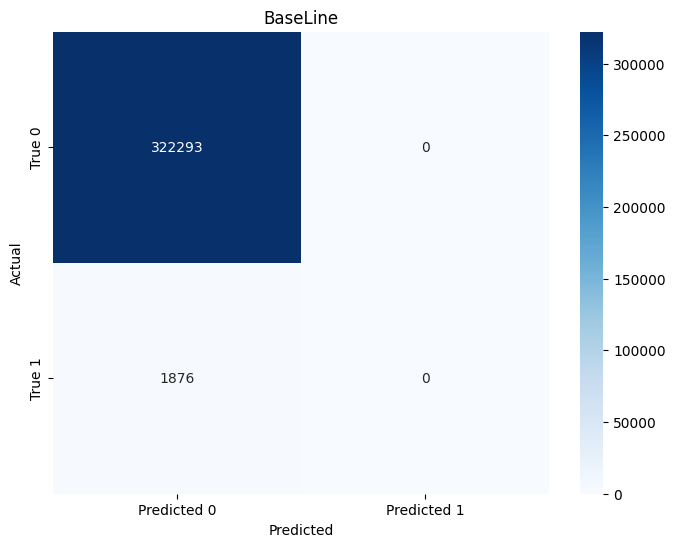

In [23]:
# оценим такой подход
print('Предсказания baseline - всегда предсказывается мажоритарный класс')
print(f1_score(y_val, y_zeros), ' -- f1')
print(roc_auc_score(y_val, y_zeros), ' -- roc_auc')
print(precision_score(y_val, y_zeros), ' -- precision')
# print(recall_score(y_val, pred))
cm = confusion_matrix(y_val, y_zeros)

cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('BaseLine')
plt.show()

#### Метрики и визуализация


In [24]:
def get_metrics(pipeline, y_true=y_val):
    #Обучение и получение предсказаний PipeLine
    pipeline.fit(X_train, y_train)
    prediction = pipeline.predict(X_val)
    probabilities = pipeline.predict_proba(X_val)[:, 1]
    #Метрики
    f1 = f1_score(y_true, prediction)
    prec = precision_score(y_true, prediction)
    rec = recall_score(y_true, prediction)
    #ROC_AUC
    fpr, tpr, thresholds_roc = roc_curve(y_true, probabilities)
    roc_auc = roc_auc_score(y_true, probabilities) 
    #PR_AUC
    precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_true, probabilities)
    pr_auc = auc(recall_vals, precision_vals)

    mets = pd.DataFrame({
        'f1': f1,
        'precision': prec,
        'recall': rec,
        'ROC_AUC': roc_auc,
        'PR_AUC': pr_auc
    }, index=[0])
    print(mets)

    # Визуализация
    figure, axes = plt.subplots(1, 3, figsize=(20,5))
    figure.suptitle(str(pipeline.get_params(deep=False)['steps'][-1][1]))
    cm = confusion_matrix(y_true, prediction)
    cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1'])

    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=True, linecolor='black', linewidths=0.5)
    axes[0].set_ylabel('Actual')
    axes[0].set_xlabel('Predicted')
    axes[0].set_title('Conf Matrix')

    axes[1].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
    axes[1].plot([0, 1], [0, 1], 'k--', label='BaseLine')
    axes[1].set_xlabel('False Positive Rate (FPR)')
    axes[1].set_ylabel('True Positive Rate (TPR)')
    axes[1].set_title('ROC Curve')
    axes[1].legend(loc='lower right')
    axes[1].grid()

    axes[2].plot(recall_vals, precision_vals, label=f'PR curve (AUC = {pr_auc:.3f})')
    axes[2].set_xlabel('recall')
    axes[2].set_ylabel('precision')
    axes[2].set_title('PR Curve')
    axes[2].legend(loc='upper right')
    axes[2].grid()

    plt.tight_layout()
    plt.show()

#### PipeLine

In [25]:
num_cols = ['amt', 'lat', 'long', 'zip', 'city_pop', 'merch_lat', 'merch_long', 'merch_zipcode', 'hour', 'name_count', 'age']
cat_cols = ['cc_num', 'merchant', 'street', 'city', 'state', 'job', 'hour', 'name_count', 'age']
drop_cols = ['dob', 'name', 'trans_year', 'trans_month', 'trans_day', 'trans_time']
ohe_cols = ['gender', 'category']

In [26]:
X_train = X_train.drop(drop_cols, axis=1)
X_test = X_test.drop(drop_cols, axis=1)
X_val = X_val.drop(drop_cols, axis=1)

In [27]:
ct1 = ColumnTransformer([
    ('ohe', OneHotEncoder(), ohe_cols),
    ('cat', TargetEncoder(), cat_cols)
    ], remainder='passthrough')

pipe1 = Pipeline([
    ('ct', ct1),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

#### Простая Log Reg

         f1  precision    recall   ROC_AUC    PR_AUC
0  0.283595    0.78125  0.173241  0.927485  0.413135


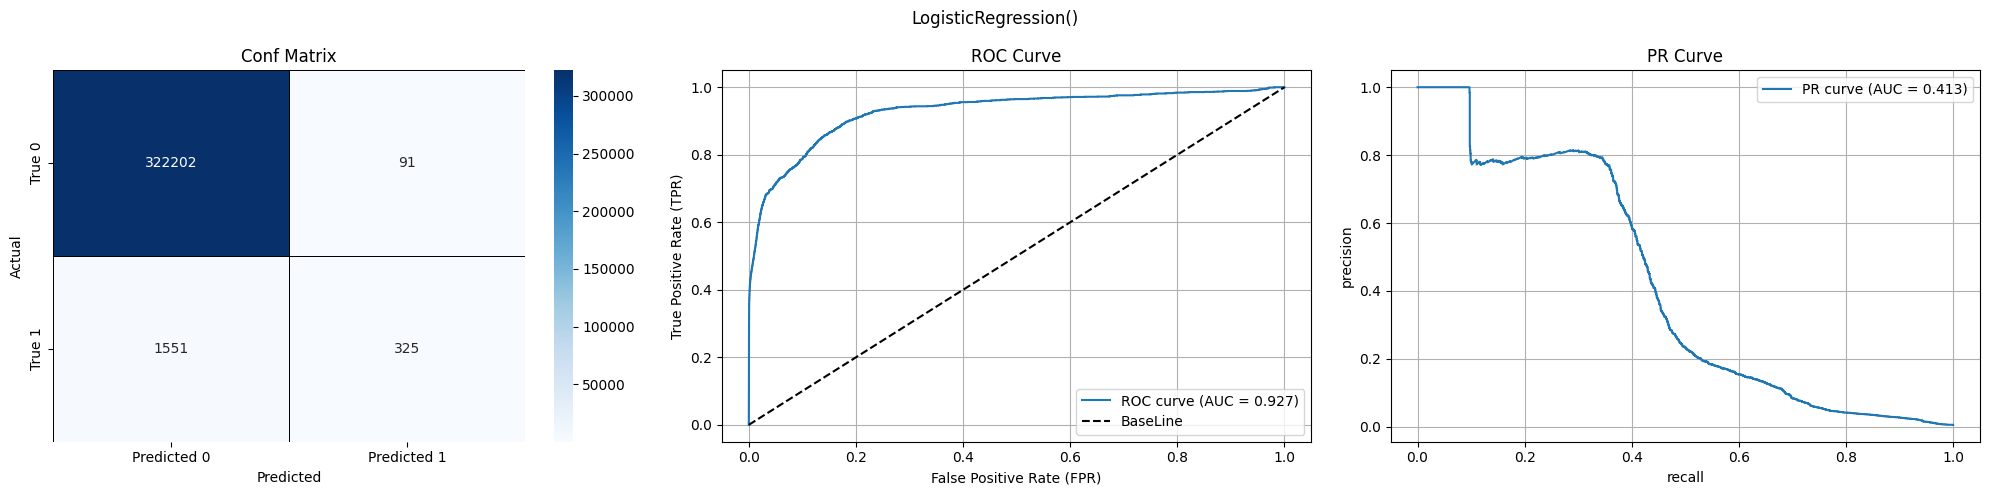

In [28]:
get_metrics(pipe1)

#### Log Reg  с параметрами class_weight': "balanced"

        f1  precision   recall   ROC_AUC    PR_AUC
0  0.08366   0.043855  0.90565  0.965288  0.352419


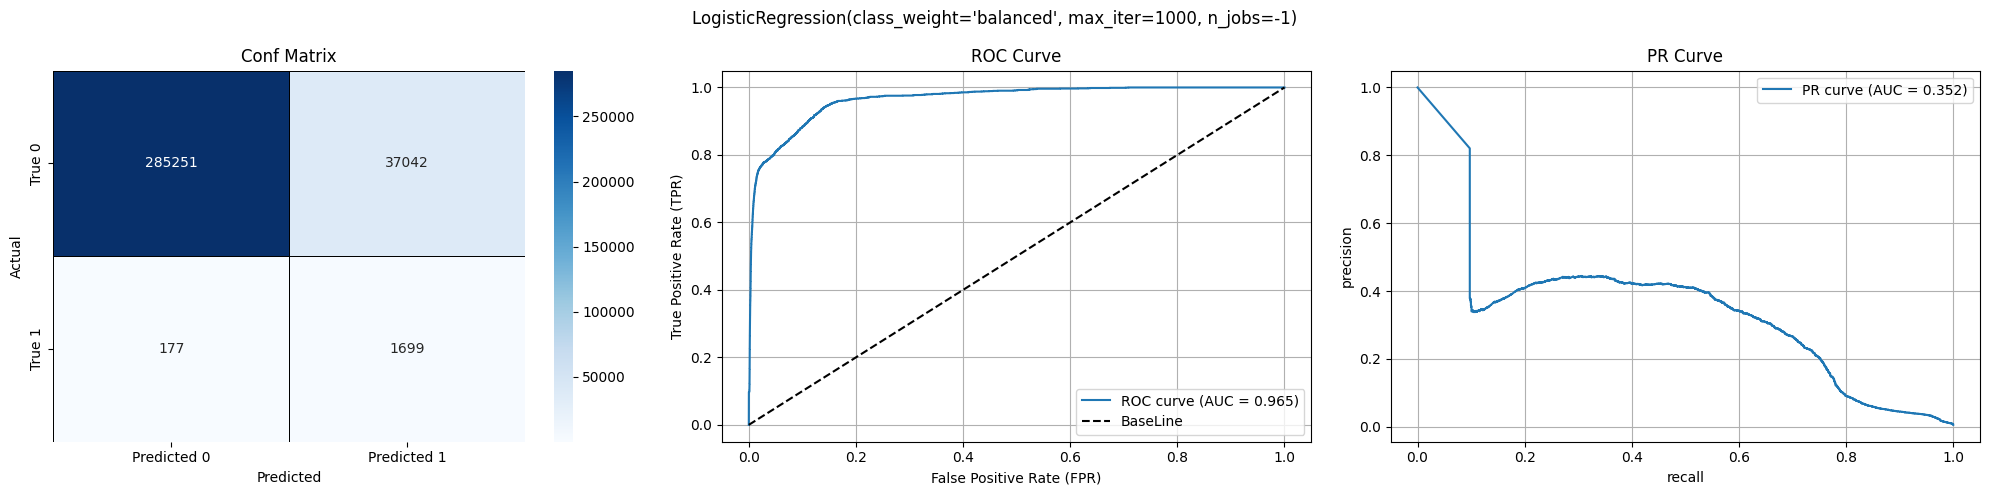

In [29]:
params = {
    'model__class_weight': "balanced",
    'model__max_iter': 1000,
    'model__n_jobs': -1
}

pipe_log = pipe1.set_params(**params)
get_metrics(pipe_log)

#### Log REg c параметрами: class_weight: balanced, penalty: l2, C: 0.01, solver: sag

         f1  precision   recall   ROC_AUC    PR_AUC
0  0.083544   0.043792  0.90565  0.965186  0.353902


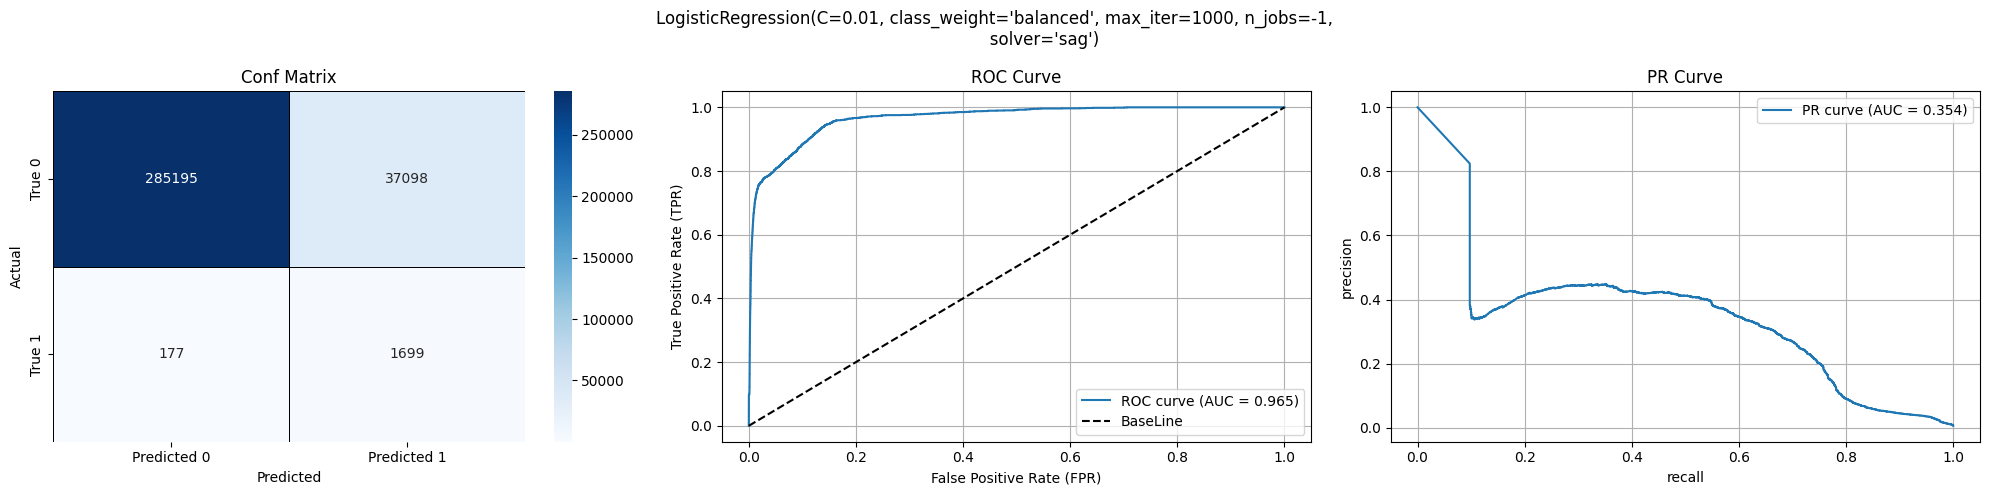

In [30]:
params = {
    'model__class_weight': "balanced",
    'model__max_iter': 1000,
    'model__penalty': 'l2',
    'model__C': 0.01,
    'model__solver': 'sag',
    'model__n_jobs': -1
}

pipe3 = pipe1.set_params(**params)
get_metrics(pipe3)

Log Reg с параметрами: class_weight: balanced, penalty: l1, C: 0.01, solver: liblinear

/mnt/c/Users/gosha22008/YandexDisk/MSc_HSE_AI/Year_project/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


         f1  precision    recall   ROC_AUC    PR_AUC
0  0.083801    0.04394  0.902985  0.965324  0.354743


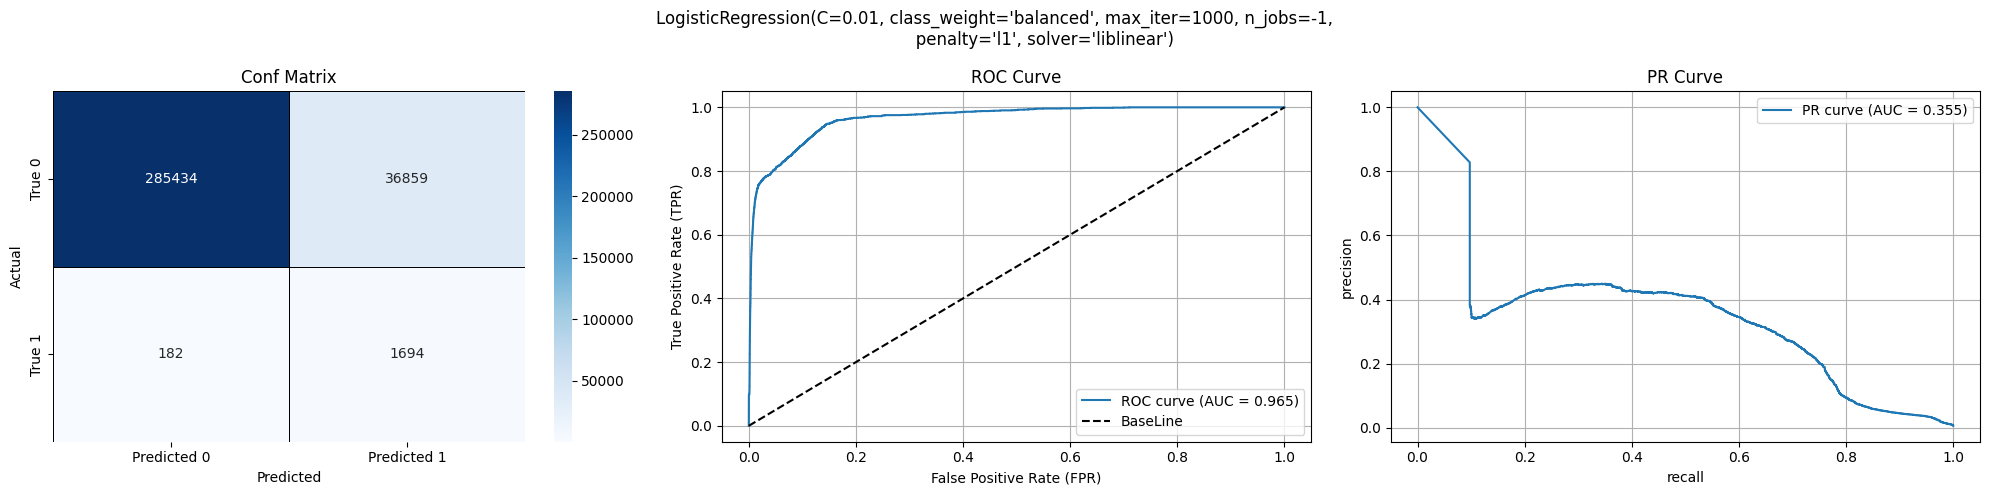

In [31]:
params = {
    'model__class_weight': "balanced",
    'model__max_iter': 1000,
    'model__penalty': 'l1',
    'model__C': 0.01,
    'model__solver': 'liblinear',
    'model__n_jobs': -1
}

pipe4 = pipe1.set_params(**params)

get_metrics(pipe4)

## Попробуем разные энкодеры

### TargetEncoder

         f1  precision    recall   ROC_AUC    PR_AUC
0  0.346567   0.773063  0.223348  0.928163  0.355323


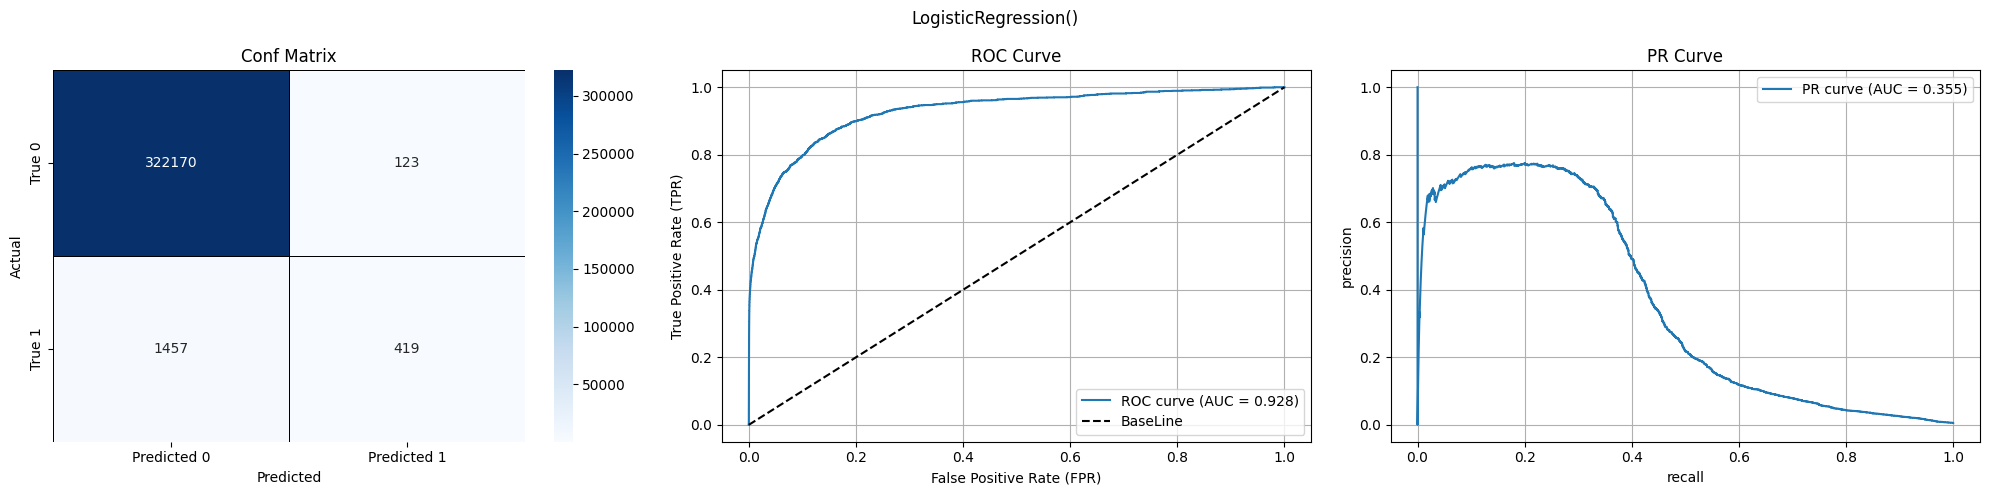

In [32]:
from category_encoders import LeaveOneOutEncoder

ct11 = ColumnTransformer([
    ('ohe', OneHotEncoder(), ohe_cols),
    ('cat', TargetEncoder(smooth=10000), cat_cols)
    ], remainder='passthrough')

pipe11 = Pipeline([
    ('ct', ct11),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

get_metrics(pipe11)

### LeaveOneOutEncoder

         f1  precision    recall   ROC_AUC    PR_AUC
0  0.243049   0.765537  0.144456  0.892764  0.390178


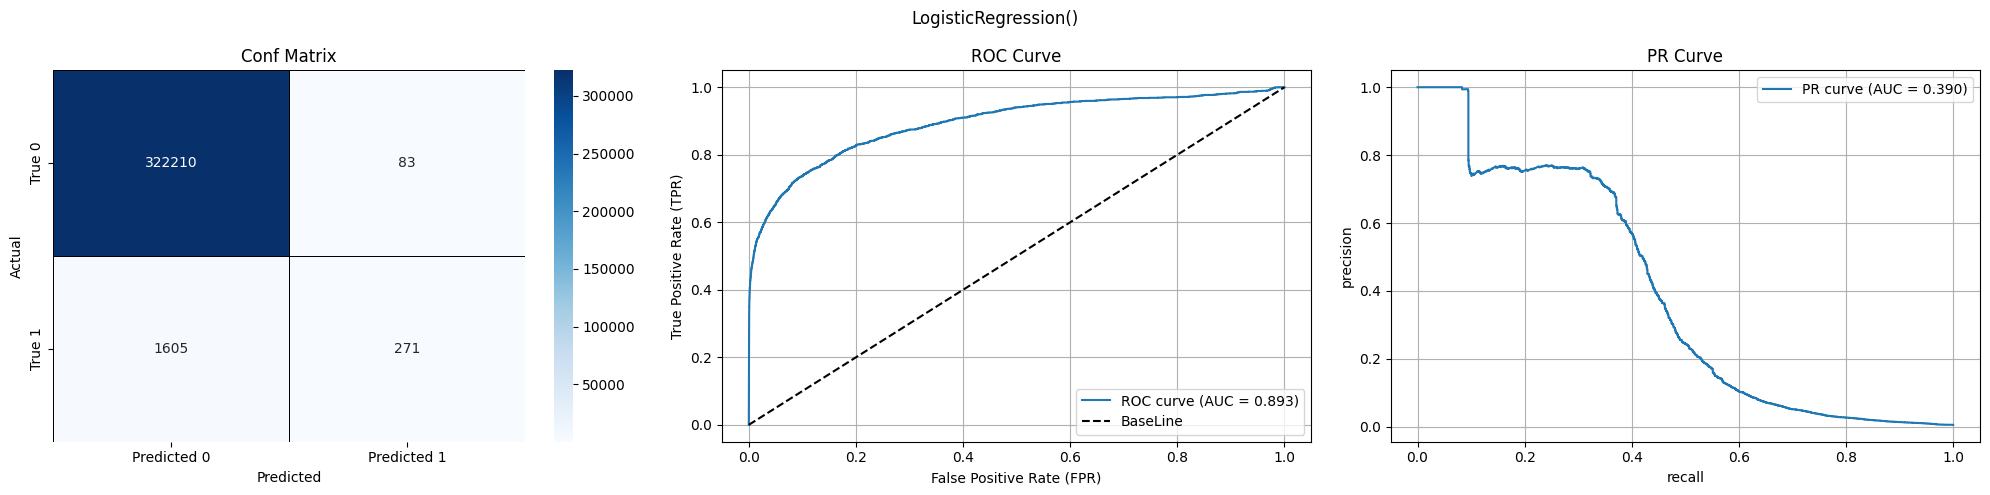

In [33]:
ct_leave = ColumnTransformer([
    ('ohe', OneHotEncoder(), ohe_cols),
    ('cat', LeaveOneOutEncoder(), cat_cols)
    ], remainder='passthrough')

pipe12 = Pipeline([
    ('ct', ct_leave),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

get_metrics(pipe12)

### WOEEncoder

         f1  precision    recall  ROC_AUC    PR_AUC
0  0.248442   0.754054  0.148721  0.90035  0.353243


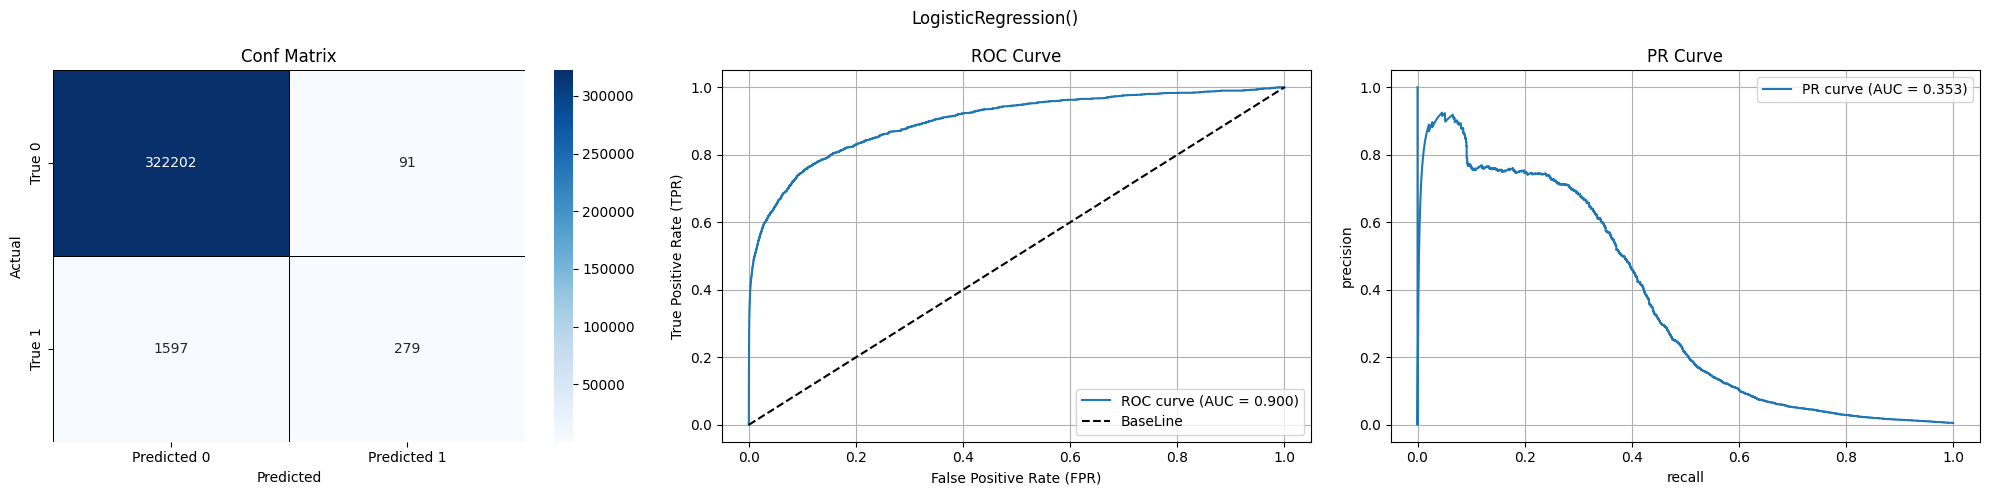

In [34]:
from category_encoders import WOEEncoder

ct_woe = ColumnTransformer([
    ('ohe', OneHotEncoder(), ohe_cols),
    ('cat', WOEEncoder(), cat_cols)
    ], remainder='passthrough')

pipe13 = Pipeline([
    ('ct', ct_woe),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

get_metrics(pipe13)

### CatBoostEncoder

         f1  precision    recall   ROC_AUC    PR_AUC
0  0.249221   0.754717  0.149254  0.888881  0.390579


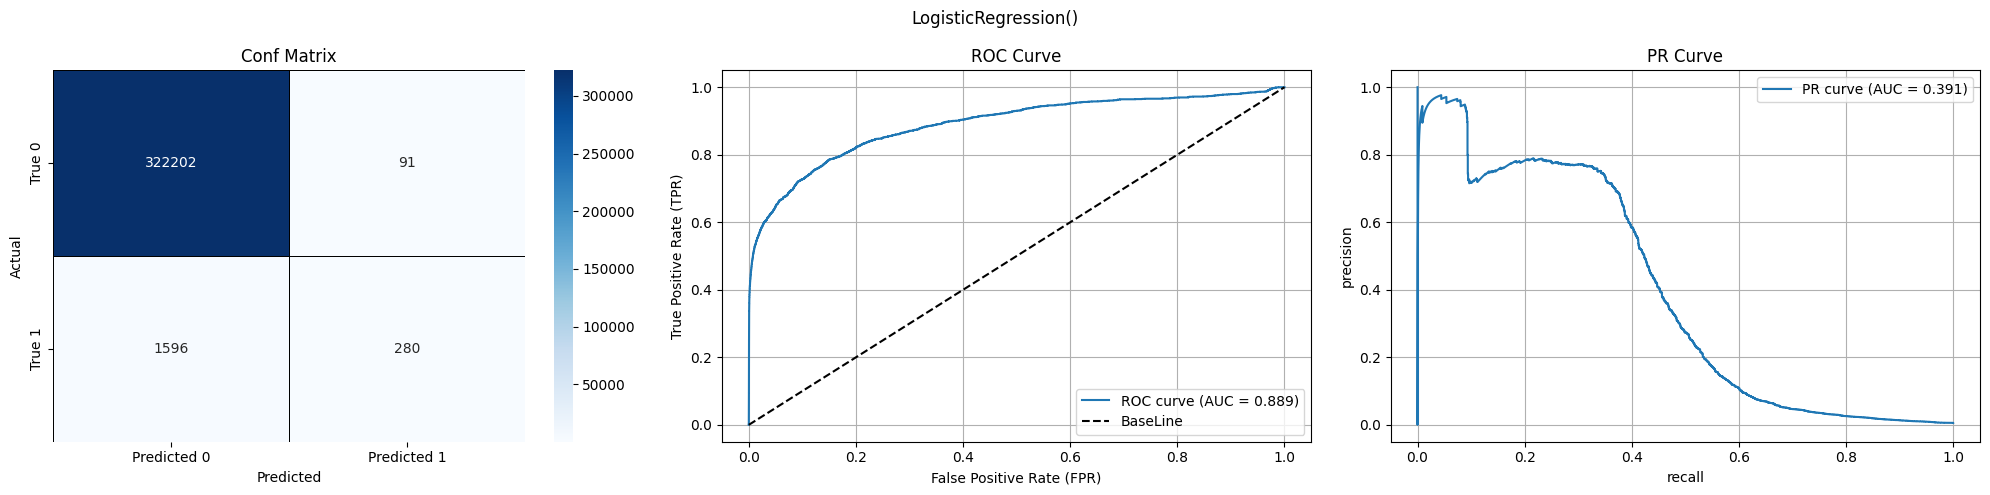

In [35]:
from category_encoders import CatBoostEncoder

ct_cat = ColumnTransformer([
    ('ohe', OneHotEncoder(), ohe_cols),
    ('cat', CatBoostEncoder(), cat_cols)
    ], remainder='passthrough')

pipe14 = Pipeline([
    ('ct', ct_cat),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

get_metrics(pipe14)